In [98]:
import nltk
import pandas as pd
import numpy as np
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment import SentimentIntensityAnalyzer
import re

nltk.download('vader_lexicon')


BA_convos = pd.read_csv(r"C:\Users\lucas\downloads\conversations_total_BA.csv")
data = BA_convos.drop(columns=['id_str','in_reply_to_status_id_str','in_reply_to_user_id_str','timestamp_ms','user.id_str','group_index'])
#data = BA_convos_txt#.head(10000)


# Additional preprocessing steps
def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()
    
    # Remove URLs
    text = re.sub(r'http\S+|www\S+', '', text)
    
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove whitespace
    text = re.sub(r'\s+', ' ', text)
    
    #Remove 2 letter words
    text = ' '.join(word for word in text.split() if len(word) > 2)
    return text

# Apply preprocessing to the text column

data.loc[:, "text"] = data["text"].apply(preprocess_text)

# Remove specific words from the text
filtered_data = data["text"].apply(lambda x: re.sub(r'\b(?:https|hi|royalfamily|britishairways|team)\b', '', x))

# Apply LDA
n_topics = 8  # Number of topics to identify
n_top_words = 4  # Number of most significant words to display for each topic

# Tokenize and vectorize the text
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(filtered_data)


lda = LatentDirichletAllocation(n_components=n_topics, random_state=42)
lda.fit(X)

# Get the most significant words for each topic
feature_names = vectorizer.get_feature_names()
topics = []
for topic_idx, topic in enumerate(lda.components_):
    top_features_idx = topic.argsort()[:-n_top_words - 1:-1]
    top_features = [feature_names[i] for i in top_features_idx]
    topics.append(top_features)

# Initialize vader 
analyzer = SentimentIntensityAnalyzer()

# Calculate average sentiment per topic
topic_sentiments = []
for i in range(n_topics):
    topic_text = filtered_data.loc[lda.transform(X).argmax(axis=1) == i]
    topic_sentiment_scores = [analyzer.polarity_scores(text)['compound'] for text in topic_text]
    average_sentiment = np.mean(topic_sentiment_scores)
    topic_sentiments.append(average_sentiment)

# Print the topics and their average sentiment
for topic_idx, topic in enumerate(topics):
    print(f"Topic {topic_idx + 1}: {' '.join(topic)}")
    print(f"Average Sentiment: {topic_sentiments[topic_idx]:.2f}")
    print()



[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\lucas\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
C:\Users\lucas\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Topic 1: sorry delay hear reply
Average Sentiment: -0.01

Topic 2: help let booking look
Average Sentiment: 0.24

Topic 3: online booking sent change
Average Sentiment: 0.06

Topic 4: flight hope great crew
Average Sentiment: 0.40

Topic 5: flights booked contact dont
Average Sentiment: 0.10

Topic 6: thanks great hear thats
Average Sentiment: 0.53

Topic 7: flight london flying lhr
Average Sentiment: 0.16

Topic 8: flight cancelled service just
Average Sentiment: -0.01



In [88]:
BA_convos_total = pd.read_csv(r"C:\Users\lucas\downloads\conversations_total_BA.csv")
BA_text = BA_convos_total.drop(columns=['id_str','in_reply_to_status_id_str','in_reply_to_user_id_str','timestamp_ms','user.id_str','group_index'])
BA_text.head()

,text
0,Thanks @British_Airways I really needed the ex...
1,@sunriseblade That certainly is annoying. Hope...
2,"@British_Airways I wish, we're getting off the..."
3,@sunriseblade We're pleased to hear the crew d...
4,"Not the best photo, taken from inside a @briti..."


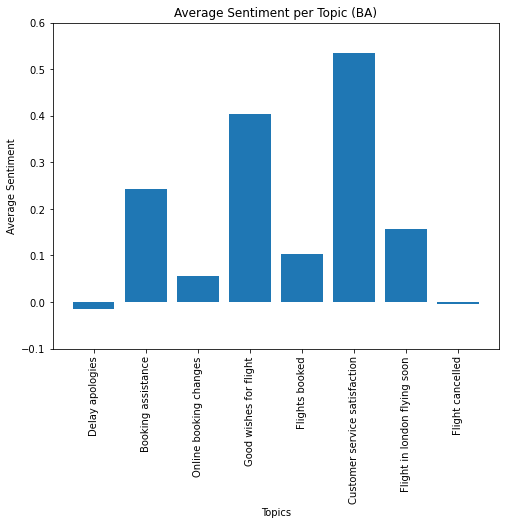

In [104]:
import matplotlib.pyplot as plt


plt.figure(figsize=(8, 6))
topic_labels = ["Delay apologies", "Booking assistance", "Online booking changes", "Good wishes for flight", "Flights booked", "Customer service satisfaction", "Flight in london flying soon", "Flight cancelled" ]#[' '.join(topic) for topic in topics]  # Modified line
plt.bar(topic_labels, topic_sentiments)  
plt.xlabel('Topics')
plt.ylabel('Average Sentiment')
plt.title('Average Sentiment per Topic (BA)')
plt.ylim([-0.1, 0.6])  
plt.xticks(rotation=90)  
plt.show()

